### Importing Libraries

In [16]:
#Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Importing Data Sets**

In [2]:
# importing dataset

dataset = pd.read_csv("/content/Salary_Data.csv")

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**Selection of Independent and Dependent Variables**

In [6]:
#let X = Independent variable which is YearsExperience
X = dataset.iloc[:, 0].values

# Let y = Dependent variable which is Salary
y = dataset.iloc[:,1].values

In [7]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

#Missing Data

In [9]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There is no missing data to handle in the dataset

# OUTLIERS IDENTIFICATION

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


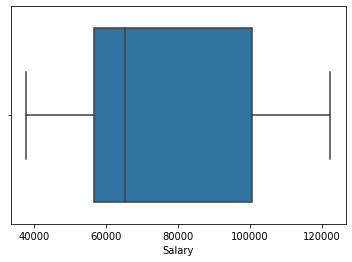

In [24]:
sns.boxplot(dataset['Salary'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


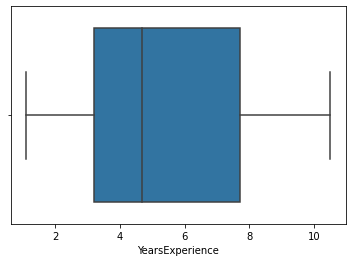

In [26]:
sns.boxplot(dataset['YearsExperience'])

As we observed from boxplot of both variables ,there is no outlier detected.so, no need to take any action

# splitting the dataset
As you can see the dataset is very small so,spillting is useless here


# machine learning algorithm

In [27]:
#simple linear regression
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [28]:
import statsmodels.formula.api as smf
model =smf.ols("Salary~YearsExperience",data=dataset).fit()

# visualisation


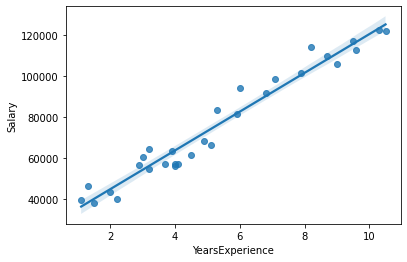

In [29]:
import seaborn as sns 
sns.regplot(x="YearsExperience",y="Salary",data=dataset)

In [30]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
# R squred values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [32]:
# to check out model working properly or not year of experience 5,7,and 9 are utilised ,last 6 value for future
newdata=pd.Series([5,7,9,11,12,13,14,15,16])

In [33]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])

In [34]:
data_pred

,YearsExperience
0,5
1,7
2,9
3,11
4,12
5,13
6,14
7,15
8,16


In [35]:
model.predict(data_pred)

0     73042.011806
1     91941.936449
2    110841.861092
3    129741.785735
4    139191.748056
5    148641.710378
6    158091.672699
7    167541.635020
8    176991.597342
dtype: float64

For Years of experience 5,7,9,11,12,13,14,15 and 16 we get the predicted values of Salary as  73042.011806,  91941.936449,110841.861092 , 129741.785735 , 139191.748056 , 148641.710378 , 158091.672699  , 167541.635020 ,176991.597342 respectively.